Tensorflow 初探

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
print(tf.__version__)

1.13.1


In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
def NN(m1,m2,w1,w2,b):
  z = m1 * w1 + m2 * w2 + b
  return sigmoid(z)

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()
phrases = ["看起來像","我猜是","我想是","可能是","看起來像是"]
data = [[3,1.5,1],[2,1,0],[4,1.5,1],[3.5,5,0],[2.0,5,1]]
rand_data = data[np.random.randint(len(data))]
m1 = rand_data[0]
m2 = rand_data[1]
prediction = NN(m1,m2,w1,w2,b)
prediction_text = ['藍色','紅色'][int(np.round(prediction))]
phrase = np.random.choice(phrases) + "" + prediction_text
o = '這個' + phrase + '真的是' + ['藍色','紅色'][rand_data[2]]
o

'這個看起來像藍色真的是紅色'

In [0]:
#Example NN
n_features = 3
n_dense_neurons = 3
tf.set_random_seed(101)

x = tf.placeholder(tf.float32, (None, n_features))
b = tf.Variable(tf.zeros([n_dense_neurons]))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
xW = tf.matmul(x,W)
z = tf.add(xW, b)
a = tf.sigmoid(z)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a,feed_dict = {x : np.random.random([5,n_features])})
print(layer_out)

Instructions for updating:
Colocations handled automatically by placer.
[[0.37180263 0.4848752  0.40013963]
 [0.37374812 0.5469098  0.48332396]
 [0.29870242 0.51684254 0.45256433]
 [0.3235687  0.45716134 0.43859345]
 [0.43333548 0.42000324 0.42359108]]


In [0]:
X = tf.constant([[1,0,1,0],[1,0,1,1],[0,1,0,1]], dtype=tf.float32)
y = tf.constant([[1],[1],[0]],dtype=tf.float32)
def sigmoid(x):
  return 1/(1+tf.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)

In [0]:
epoch = 1000
lr = 0.1
inputlayer_neurons = X.shape[1]
hiddenlayer_neurons = 10
output_neurons = 1

In [0]:
wh = tf.random_normal(shape=[int(inputlayer_neurons),int(hiddenlayer_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
bh =  tf.random_normal(shape=[1,int(hiddenlayer_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
wout =  tf.random_normal(shape=[int(hiddenlayer_neurons),int(output_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
bout =  tf.random_normal(shape=[1,int(output_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)

In [0]:
for i in range(epoch):
  hidden_layer_input1 = tf.matmul(X, wh)
  hidden_layer_input = hidden_layer_input1 + bh
  hidden_layer_activations = sigmoid(hidden_layer_input)
  output_layer_input1 = tf.matmul(hidden_layer_activations, wout)
  output_layer_input = output_layer_input1 + bout
  output = sigmoid(output_layer_input)
  
  E= y-output
  back_output_layer = derivatives_sigmoid(output)
  back_hidden_layer = derivatives_sigmoid(hidden_layer_activations)
  d_output = E * back_output_layer
  Error_at_hidden_layer = tf.matmul(d_output, tf.transpose(wout))
  d_hiddenlayer = Error_at_hidden_layer * back_hidden_layer
  wout += tf.matmul(tf.transpose(hidden_layer_activations), d_output) * lr 
  bout += tf.reduce_sum(d_output) * lr
  wh += tf.matmul(tf.transpose(X), d_hiddenlayer) * lr
  bh += tf.reduce_sum(d_output)*lr
  
sess = tf.Session()
print('Actual :\n', sess.run(y), '\n')
print('Predicted :\n', sess.run(output), '\n')
  
  

Actual :
 [[1.]
 [1.]
 [0.]] 

Predicted :
 [[0.9697147 ]
 [0.92694074]
 [0.09504487]] 



In [0]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
data = load_iris()
x_train, x_test, y_train, y_test= train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=50)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

W0821 02:25:12.908116 140339020412800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 73 samples, validate on 32 samples
Epoch 1/100
73/73 [==============================] - 1s 11ms/sample - loss: 2.6117 - acc: 0.0685 - val_loss: 2.0546 - val_acc: 0.3750
Epoch 2/100
73/73 [==============================] - 0s 178us/sample - loss: 1.9601 - acc: 0.3288 - val_loss: 1.5441 - val_acc: 0.5625
Epoch 3/100
73/73 [==============================] - 0s 164us/sample - loss: 1.4492 - acc: 0.5342 - val_loss: 1.2325 - val_acc: 0.5625
Epoch 4/100
73/73 [==============================] - 0s 140us/sample - loss: 1.2534 - acc: 0.5068 - val_loss: 1.0361 - val_acc: 0.5938
Epoch 5/100
73/73 [==============================] - 0s 161us/sample - loss: 1.0224 - acc: 0.6301 - val_loss: 0.9142 - val_acc: 0.5938
Epoch 6/100
73/73 [==============================] - 0s 155us/sample - loss: 0.9114 - acc: 0.7123 - val_loss: 0.8556 - val_acc: 0.8438
Epoch 7/100
73/73 [==============================] - 0s 161us/sample - loss: 0.8759 - acc: 0.6575 - val_loss: 0.8088 - val_acc: 0.8438
Epoch 8/100


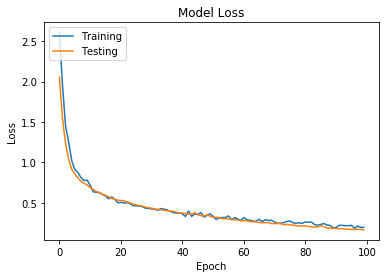

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x_test, y_test)

45/45 [==============================] - 0s 198us/sample - loss: 0.1348 - acc: 1.0000


[0.13479209542274476, 1.0]

In [0]:
y_pred = model.predict_classes(x_test[0:3])

In [0]:
print(y_pred)

[1 0 2]


In [0]:
x_test[0:3],y_test[0:3]

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3]]), array([1, 0, 2]))

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
df=pd.DataFrame(data.data)

In [0]:
data_df = df[[0,1,2]]
target_df = df[3]
X_train, X_test, y_train, y_test = train_test_split(data_df, target_df)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1000, input_dim=3, kernel_initializer='normal', activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])
adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=300, validation_split=0.4)

Train on 67 samples, validate on 45 samples
Epoch 1/300
67/67 [==============================] - 0s 6ms/sample - loss: 3.1736 - mean_squared_error: 3.1736 - mean_absolute_error: 1.5998 - val_loss: 2.1377 - val_mean_squared_error: 2.1377 - val_mean_absolute_error: 1.2715
Epoch 2/300
67/67 [==============================] - 0s 375us/sample - loss: 1.9540 - mean_squared_error: 1.9540 - mean_absolute_error: 1.1968 - val_loss: 1.2219 - val_mean_squared_error: 1.2219 - val_mean_absolute_error: 0.9003
Epoch 3/300
67/67 [==============================] - 0s 279us/sample - loss: 1.1187 - mean_squared_error: 1.1187 - mean_absolute_error: 0.8500 - val_loss: 0.7081 - val_mean_squared_error: 0.7081 - val_mean_absolute_error: 0.6848
Epoch 4/300
67/67 [==============================] - 0s 271us/sample - loss: 0.6389 - mean_squared_error: 0.6389 - mean_absolute_error: 0.6675 - val_loss: 0.4213 - val_mean_squared_error: 0.4213 - val_mean_absolute_error: 0.5561
Epoch 5/300
67/67 [=======================

In [0]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 298us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - mean_absolute_error: 0.1596


[0.03854225850418994, 0.03854226, 0.15955734]

In [0]:
y_pred = model.predict_classes(X_test[0:3])
y_pred

array([[1],
       [0],
       [1]], dtype=int32)

In [0]:
y_pred,y_test[0:3]

(array([[1],
        [0],
        [1]], dtype=int32), 123    1.8
 19     0.3
 128    2.1
 Name: 3, dtype: float64)

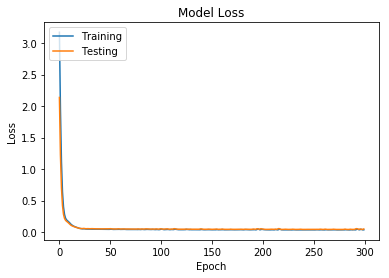

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()